In [1]:
import numpy as np
import matplotlib.pyplot as plt

Usando planet1.dat como estrella secundaria y planet2.dat como planeta


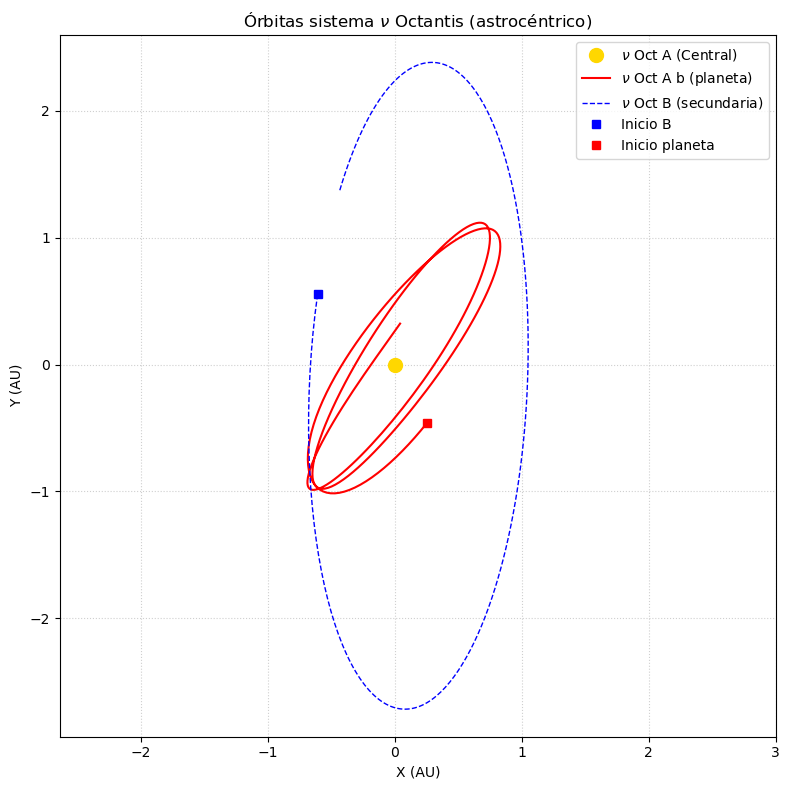

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

def load_table(fn):
    return np.loadtxt(fn)

# rutas relativas dentro de la carpeta del notebook
p1 = Path("planet1.dat")   # se interpreta como la estrella secundaria
p2 = Path("planet2.dat")   # se interpreta como el planeta

X_p = Y_p = X_B = Y_B = None
tiempo = None

if p1.exists() and p2.exists():
    # caso: archivos individuales por cuerpo
    dB = load_table(p1)   # planet1.dat -> estrella secundaria
    dP = load_table(p2)   # planet2.dat -> planeta
    # usar tiempo del planeta si existe, sino el de la secundaria
    tiempo = dP[:,0] if dP.shape[1]>0 else dB[:,0]
    X_B, Y_B = dB[:,1], dB[:,2]
    X_p, Y_p = dP[:,1], dP[:,2]
    print(f"Usando {p1} como estrella secundaria y {p2} como planeta")
elif p1.exists():
    # único archivo: asumir layout típico NCORP con cuerpo1 = secundaria, cuerpo2 = planeta
    d = load_table(p1)
    tiempo = d[:,0]
    ncol = d.shape[1]
    if ncol >= 9:
        # mapa: t, body1_x,y,z, vx,vy,vz, body2_x,y,z, ...
        X_B, Y_B = d[:,1], d[:,2]        # cuerpo1 -> secundaria
        # cuerpo2 -> planeta si hay suficientes columnas
        if ncol > 8:
            X_p, Y_p = d[:,7], d[:,8]
        print(f"Usando {p1} con múltiples cuerpos (cuerpo1=secundaria, cuerpo2=planeta, cols={ncol})")
    elif ncol >= 3:
        # formato simple t,x,y -> tratar como planeta (no hay secundaria por separado)
        X_p, Y_p = d[:,1], d[:,2]
        print(f"Usando {p1} (formato t,x,y) como planeta")
    else:
        print(f"{p1} tiene formato inesperado (ncols={ncol})")
else:
    dats = sorted([f for f in os.listdir('.') if f.endswith('.dat')])
    print("No se encontraron planet1.dat/planet2.dat. Archivos .dat en el directorio:", dats)

# Graficar si tenemos al menos el planeta
if X_p is None or Y_p is None:
    print("No hay coordenadas del planeta. Verifica planet1.dat/planet2.dat")
else:
    plt.figure(figsize=(8,8))
    # estrella central en el origen (astrocéntrico)
    plt.plot(0, 0, 'o', color='gold', markersize=10, label=r'$\nu$ Oct A (Central)')
    # planeta
    plt.plot(X_p, Y_p, '-', color='red', lw=1.5, label=r'$\nu$ Oct A b (planeta)')
    # secundaria si existe
    if X_B is not None and Y_B is not None:
        plt.plot(X_B, Y_B, '--', color='blue', lw=1.0, label=r'$\nu$ Oct B (secundaria)')
        # marcar posición inicial de la secundaria
        plt.plot(X_B[0], Y_B[0], 's', color='blue', markersize=6, label='Inicio B')
    # marcar posición inicial del planeta
    plt.plot(X_p[0], Y_p[0], 's', color='red', markersize=6, label='Inicio planeta')

    plt.xlabel('X (AU)')
    plt.ylabel('Y (AU)')
    plt.title(r'Órbitas sistema $\nu$ Octantis (astrocéntrico)')
    plt.axis('equal')
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Acá voy a hacer que la imagen se guarde en un archivo PNG
plt.savefig("orbitas_nu_octantis.png", dpi=300)

<Figure size 640x480 with 0 Axes>